In [10]:
import re
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [3]:
import os
os.chdir('../../../')
!pwd

/mnt/KInsektDaten/teo


In [4]:
with open('./BGR/label_embeddings/all_horizons_embeddings.pickle', 'rb') as handle:
    emb_dict = pickle.load(handle)

In [5]:
def sort_by_last_capital(label):
    # Find all capital letters in the string
    capitals = re.findall(r'[A-Z]', label)
    # Use the last capital letter if it exists, otherwise fallback to the first character
    return capitals[-1] if capitals else label[0]

In [28]:
# Test trials with random true and predicted vectors
labels = np.random.randint(0, len(emb_dict['ind2label']), 200)
predictions = np.random.randint(0, len(emb_dict['ind2label']), 200)

Text(0.5, 1.0, 'Confusion Matrix test')

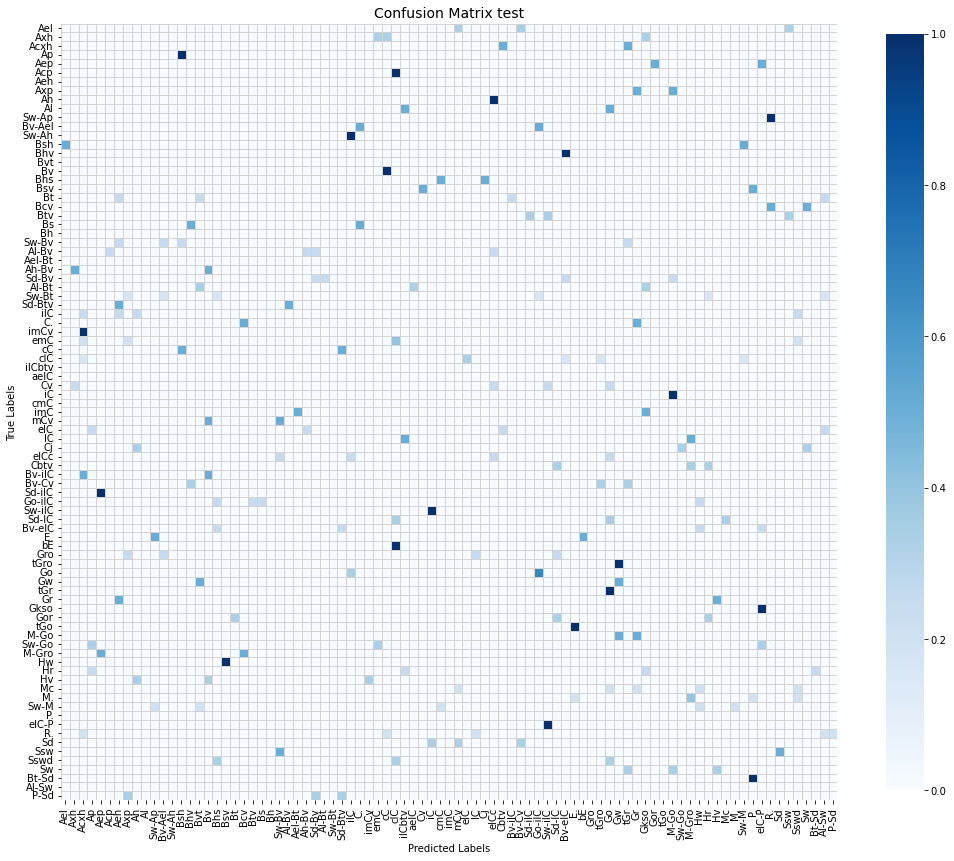

In [29]:
mode = 'test'
labels = [emb_dict['ind2label'][label] for label in labels]
predictions = [emb_dict['ind2label'][label] for label in predictions]
possible_labels = sorted(emb_dict['ind2label'], key=sort_by_last_capital)

# Compute confusion matrix
cm = confusion_matrix(labels, predictions, labels=possible_labels, normalize='true')

# Set up the figure size dynamically for large matrices
fig_size = max(10, len(possible_labels) * 0.2)

fig, ax = plt.subplots(figsize=(fig_size, fig_size))
sns.heatmap(cm, cmap='Blues',
            xticklabels=possible_labels, yticklabels=possible_labels, 
            cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='lightgray')
ax.set_aspect('equal')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title(f'Confusion Matrix {mode}', fontsize=14)

In [ ]:
# Aggregate into main symbols
labels = [re.findall(r'[A-Z]', label)[-1] for label in labels]
predictions = [re.findall(r'[A-Z]', label)[-1] for label in predictions]

In [33]:
possible_labels = sorted(set(labels))
possible_labels

['A', 'B', 'C', 'E', 'G', 'H', 'M', 'P', 'R', 'S']

Text(0.5, 1.0, 'Confusion Matrix test')

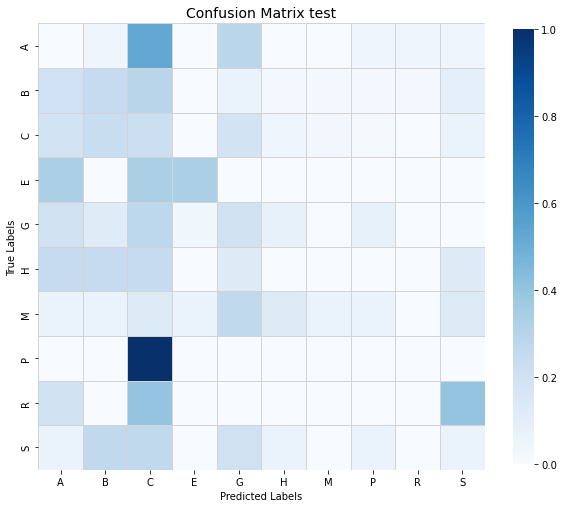

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(labels, predictions, labels=possible_labels, normalize='true')

# Set up the figure size dynamically for large matrices
fig_size = max(10, len(possible_labels) * 0.2)

fig, ax = plt.subplots(figsize=(fig_size, fig_size))
sns.heatmap(cm, cmap='Blues',
            xticklabels=possible_labels, yticklabels=possible_labels, 
            cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='lightgray')
ax.set_aspect('equal')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title(f'Confusion Matrix {mode}', fontsize=14)